In [204]:
import pandas as pd
import numpy as np
import geopandas as gdf
import json
import matplotlib.pyplot as plt
import os
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [205]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [180]:
gdf.crs="EPSG:31700"

In [181]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [182]:
home_path="/home/Github/COVID-19_Interactive/infra_code/"
file_list=[]
for file in os.listdir(home_path):
    if "ByCounty" in file:
        print(file)
        file_list.append(file)
        

df_list=[]
for f in file_list:
    d=os.path.join(home_path,f)
    d_dict=pd.read_json(d)['data'][0]
    df=pd.DataFrame(d_dict)
    df_list.append(df)

df1,df2,df3=df_list[0],df_list[1],df_list[2]
for d in df_list:
    print(d.head(),"\n")

getCasesByCounty
getHealthCasesByCounty
getDeadCasesByCounty
  county_code  total_county  total_healed  total_dead            county
0          SV          2692             4         156           SUCEAVA
1          NA          1234             0           0  JUDEȚ NECUNOSCUT
2           B          1063             3          59         BUCUREȘTI
3          HD           520             3          58         HUNEDOARA
4          AR           511             1          67              ARAD 

  county_code  total_county         county
0          DB             6      DÂMBOVIȚA
1          SV             4        SUCEAVA
2          CS             4  CARAȘ-SEVERIN
3          TM             4          TIMIȘ
4           B             3      BUCUREȘTI 

  county_code  total_county     county
0          SV           156    SUCEAVA
1          AR            67       ARAD
2          GL            61     GALAȚI
3           B            59  BUCUREȘTI
4          HD            58  HUNEDOARA 



### Load json ref:


https://stackoverflow.com/questions/49505872/read-json-to-pandas-dataframe-valueerror-mixing-dicts-with-non-series-may-lea#49505918

In [183]:
world=gdf.read_file(gdf.datasets.get_path('naturalearth_lowres'))
ro_bound=world[world['name']=='Romania']

In [184]:
ro_map1=gdf.read_file('romania-counties.json')
ro_map1['NAME_1']=ro_map1['NAME_1'].str.upper()
ro_map1['NAME_1'].replace({"BUCHAREST":"BUCUREȘTI"},inplace=True)
ro_map1.head()

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,None,187,ROU,Romania,1,ALBA,Judet,County,,,"POLYGON ((23.98685 46.43134, 24.00062 46.42857..."
1,None,187,ROU,Romania,2,ARAD,Judet,County,,,"POLYGON ((22.67806 46.40624, 22.68364 46.38616..."
2,None,187,ROU,Romania,3,ARGEȘ,Judet,County,,Arges,"POLYGON ((25.32318 45.38138, 25.31835 45.37009..."
3,None,187,ROU,Romania,4,BACĂU,Judet,County,,Bacau,"POLYGON ((27.20767 46.77019, 27.21251 46.76116..."
4,None,187,ROU,Romania,5,BIHOR,Judet,County,,,"POLYGON ((22.61443 47.33495, 22.57944 47.30558..."


In [185]:
ro_map1.drop(columns=['id','NL_NAME_1','VARNAME_1'],inplace=True)
ro_map1.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,geometry
0,187,ROU,Romania,1,ALBA,Judet,County,"POLYGON ((23.98685 46.43134, 24.00062 46.42857..."
1,187,ROU,Romania,2,ARAD,Judet,County,"POLYGON ((22.67806 46.40624, 22.68364 46.38616..."
2,187,ROU,Romania,3,ARGEȘ,Judet,County,"POLYGON ((25.32318 45.38138, 25.31835 45.37009..."
3,187,ROU,Romania,4,BACĂU,Judet,County,"POLYGON ((27.20767 46.77019, 27.21251 46.76116..."
4,187,ROU,Romania,5,BIHOR,Judet,County,"POLYGON ((22.61443 47.33495, 22.57944 47.30558..."


In [186]:
total=ro_map1.merge(df1,left_on='NAME_1',right_on="county")
total.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,geometry,county_code,total_county,total_healed,total_dead,county
0,187,ROU,Romania,1,ALBA,Judet,County,"POLYGON ((23.98685 46.43134, 24.00062 46.42857...",AB,247,3,11,ALBA
1,187,ROU,Romania,2,ARAD,Judet,County,"POLYGON ((22.67806 46.40624, 22.68364 46.38616...",AR,511,1,67,ARAD
2,187,ROU,Romania,3,ARGEȘ,Judet,County,"POLYGON ((25.32318 45.38138, 25.31835 45.37009...",AG,204,0,13,ARGEȘ
3,187,ROU,Romania,4,BACĂU,Judet,County,"POLYGON ((27.20767 46.77019, 27.21251 46.76116...",BC,315,0,30,BACĂU
4,187,ROU,Romania,5,BIHOR,Judet,County,"POLYGON ((22.61443 47.33495, 22.57944 47.30558...",BH,468,0,15,BIHOR


### Geojson wrangling

In [187]:
geojson2=total[total.columns[:9]]
geojson2.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,geometry,county_code
0,187,ROU,Romania,1,ALBA,Judet,County,"POLYGON ((23.98685 46.43134, 24.00062 46.42857...",AB
1,187,ROU,Romania,2,ARAD,Judet,County,"POLYGON ((22.67806 46.40624, 22.68364 46.38616...",AR
2,187,ROU,Romania,3,ARGEȘ,Judet,County,"POLYGON ((25.32318 45.38138, 25.31835 45.37009...",AG
3,187,ROU,Romania,4,BACĂU,Judet,County,"POLYGON ((27.20767 46.77019, 27.21251 46.76116...",BC
4,187,ROU,Romania,5,BIHOR,Judet,County,"POLYGON ((22.61443 47.33495, 22.57944 47.30558...",BH


In [188]:
total.drop(columns=['county'],inplace=True)

In [196]:
def map_plot(df,col):
    colors = 20
    cmap = 'Blues'
    figsize = (16, 10)
    df.plot(figsize=figsize,column=col,cmap=cmap, scheme='quantiles',k=colors,legend=True)
    plt.axis('off')
    #ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
    #ax.set_axis_off()

### Total county

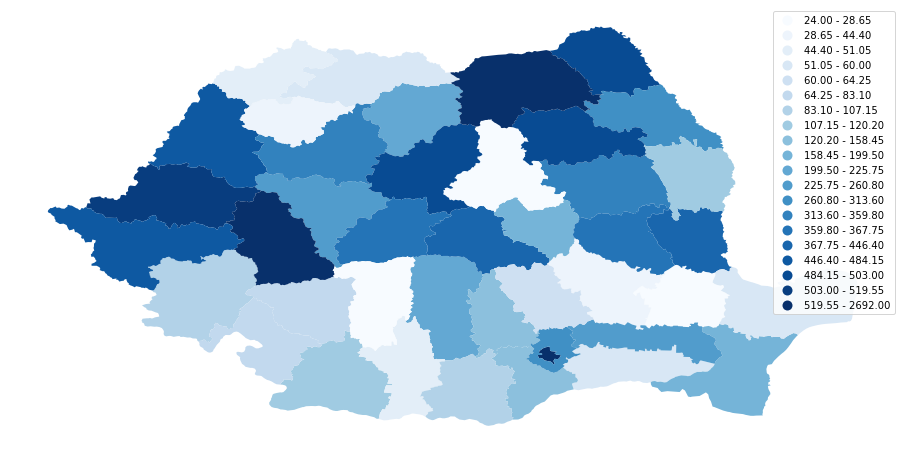

In [198]:
map_plot(df=total,col='total_county')

### Total Healed

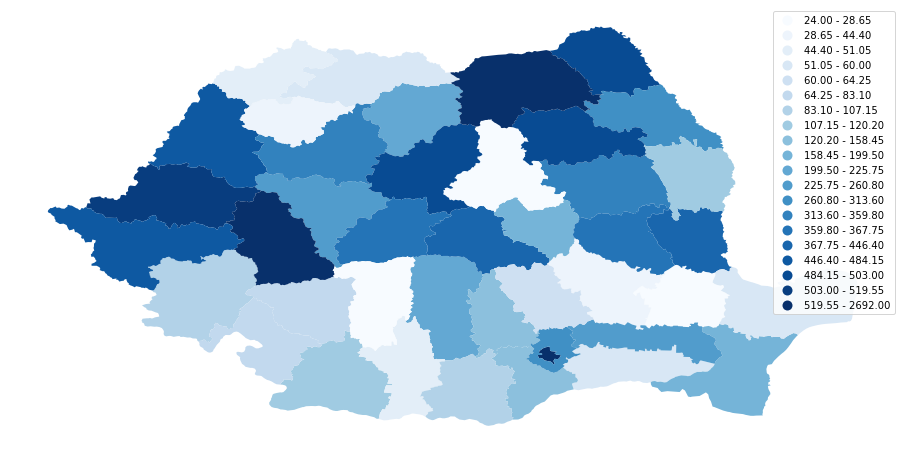

In [199]:
col='total_healed'
map_plot(df=total,col='total_county')

### Total Dead

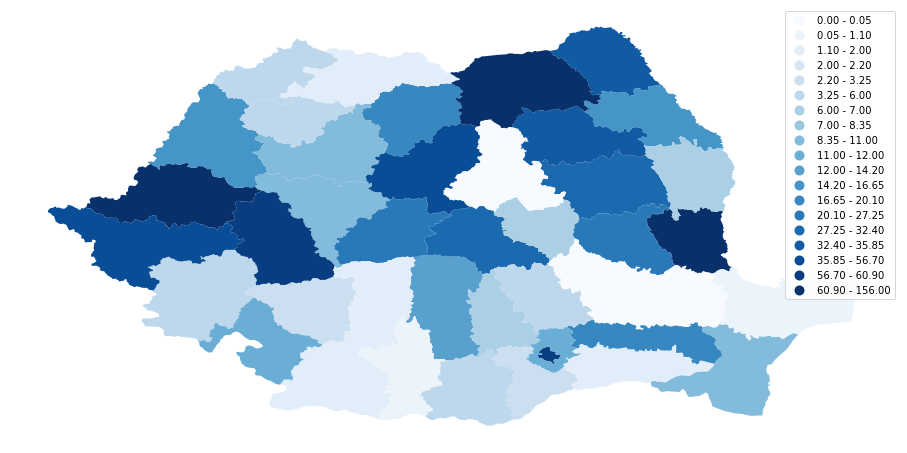

In [200]:
map_plot(df=total,col='total_dead')

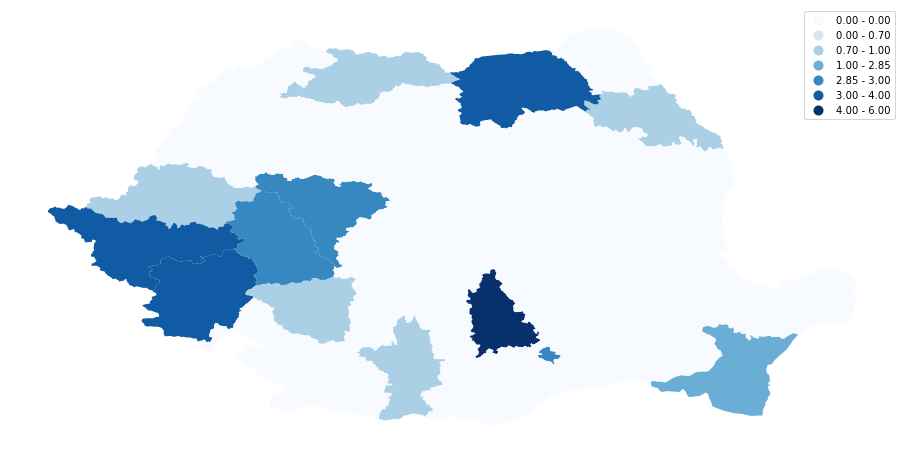

In [203]:
map_plot(df=total,col='total_healed')

In [194]:
fig = ff.create_table(df1[df1.columns[1:]])
fig.show()

### Stats of the day


In [195]:
stats=df1.describe()
stats.drop(index='count',inplace=True)
stats.reset_index(inplace=True)
stats.columns=['stats','total_county','total_healed','total_dead']

fig = ff.create_table(stats)
fig.show()

### Daily case report